<a href="https://colab.research.google.com/github/khaledICT/KhaledICT/blob/main/MWS_WDA_S24_Khaled_Rami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import files


uploaded = files.upload()


Saving sales_data_sample.csv to sales_data_sample.csv


In [4]:
# Importing libraries
import numpy as np # type: ignore # linear algebra
import pandas as pd # type: ignore # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore
import plotly.express as px # type: ignore

In [5]:
df=pd.read_csv('sales_data_sample.csv',encoding='Latin-1')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
# Data Cleaning
# Convert columns names to lower case
df.columns = df.columns.str.lower()


# droping unnecessary columns
df.drop(columns=[ 'orderlinenumber','status', 'qtr_id','msrp', 'productcode','customername', 'phone','addressline2', 'state', 'postalcode', 'country', 'territory','contactlastname', 'contactfirstname', 'dealsize'], axis=1, inplace=True)
# Fixing worng data type
df['orderdate'] = pd.to_datetime(df['orderdate'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ordernumber      2823 non-null   int64         
 1   quantityordered  2823 non-null   int64         
 2   priceeach        2823 non-null   float64       
 3   sales            2823 non-null   float64       
 4   orderdate        2823 non-null   datetime64[ns]
 5   month_id         2823 non-null   int64         
 6   year_id          2823 non-null   int64         
 7   productline      2823 non-null   object        
 8   addressline1     2823 non-null   object        
 9   city             2823 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 220.7+ KB


,ordernumber,quantityordered,priceeach,sales,orderdate,month_id,year_id,productline,addressline1,city
0,10107,30,95.70,2871.00,2003-02-24,2,2003,Motorcycles,897 Long Airport Avenue,NYC
1,10121,34,81.35,2765.90,2003-05-07,5,2003,Motorcycles,59 rue de l'Abbaye,Reims
2,10134,41,94.74,3884.34,2003-07-01,7,2003,Motorcycles,27 rue du Colonel Pierre Avia,Paris
3,10145,45,83.26,3746.70,2003-08-25,8,2003,Motorcycles,78934 Hillside Dr.,Pasadena
4,10159,49,100.00,5205.27,2003-10-10,10,2003,Motorcycles,7734 Strong St.,San Francisco


In [7]:
# Handling Missing Values
df.isnull().sum()

,0
ordernumber,0
quantityordered,0
priceeach,0
sales,0
orderdate,0
month_id,0
year_id,0
productline,0
addressline1,0
city,0


In [ ]:
df.describe()  # to get basic statistical information of categorical data

,orderid,quantityorder,priceeach,sales,orderdate,month_id,year_id
count,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.00000
mean,10258.725115,35.092809,83.658544,3553.889072,2004-05-11 00:16:49.989373056,7.092455,2003.81509
min,10100.000000,6.000000,26.880000,482.130000,2003-01-06 00:00:00,1.000000,2003.00000
25%,10180.000000,27.000000,68.860000,2203.430000,2003-11-06 12:00:00,4.000000,2003.00000
50%,10262.000000,35.000000,95.700000,3184.800000,2004-06-15 00:00:00,8.000000,2004.00000
75%,10333.500000,43.000000,100.000000,4508.000000,2004-11-17 12:00:00,11.000000,2004.00000
max,10425.000000,97.000000,100.000000,14082.800000,2005-05-31 00:00:00,12.000000,2005.00000
std,92.085478,9.741443,20.174277,1841.865106,NaN,3.656633,0.69967


In [ ]:
# Total revenue generated.
# Sum of sales
Total_revenue=sum ( df['sales'] )
print(Total_revenue,"USD")

10032628.85000001 USD


In [ ]:
# Total units sold for each product
# Sum of quantityorder for each product
df1 = df.groupby('product')['quantityorder'].sum().reset_index()
df1


# Rank products based on total units sold (descending order)
df1['Rank'] = df1['quantityorder'].rank(ascending=False, method='min')

# Sort by rank
df1 = df1.sort_values(by=['Rank'])

# Display the ranked products
print("Product Ranking based on Total Units Sold:")
print(df1[['product', 'quantityorder', 'Rank']])

# Recommendations
print("\nRecommendations:")
print("The company should focus on selling more of the following products:")
for index, row in df1.head(5).iterrows():  # Consider top 5 ranked products
    print(f"- {row['product']}: Total units sold = {row['quantityorder']}")

Product Ranking based on Total Units Sold:
            product  quantityorder  Rank
0      Classic Cars          33992   1.0
6      Vintage Cars          21069   2.0
1       Motorcycles          11663   3.0
5  Trucks and Buses          10777   4.0
2            Planes          10727   5.0
3             Ships           8127   6.0
4            Trains           2712   7.0

Recommendations:
The company should focus on selling more of the following products:
- Classic Cars: Total units sold = 33992
- Vintage Cars: Total units sold = 21069
- Motorcycles: Total units sold = 11663
- Trucks and Buses: Total units sold = 10777
- Planes: Total units sold = 10727


In [ ]:
# avg_price_untis for each product
df_units=df.groupby('product')
avg_price_untis=df_units['priceeach'].mean()
print('avg_price_untis for each product')
print(avg_price_untis)



avg_price_untis for each product
product
Classic Cars        87.335781
Motorcycles         82.997553
Planes              81.740915
Ships               83.855470
Trains              75.654675
Trucks and Buses    87.527940
Vintage Cars        78.148204
Name: priceeach, dtype: float64


In [ ]:
# Total units sold for each product
df1 = df.groupby('product')['quantityorder'].sum().reset_index()
df1['Rank_UnitsSold'] = df1['quantityorder'].rank(ascending=False, method='min')

# Average price per unit for each product
avg_price_untis = df.groupby('product')['priceeach'].mean().reset_index()
avg_price_untis['Rank_AvgPrice'] = avg_price_untis['priceeach'].rank(ascending=False, method='min')

# Merge the two DataFrames based on 'product'
ranked_products = pd.merge(df1, avg_price_untis, on='product')

# Sort by Rank_UnitsSold and then by Rank_AvgPrice
ranked_products = ranked_products.sort_values(by=['Rank_UnitsSold', 'Rank_AvgPrice'])

# Display the ranked products
print("Product Ranking based on Total Units Sold and Average Price:")
print(ranked_products[['product', 'quantityorder', 'Rank_UnitsSold', 'priceeach', 'Rank_AvgPrice']])

# Recommendations
print("\nRecommendations:")
print("The company should focus on selling more of the following products:")
for index, row in ranked_products.head(5).iterrows():  # Consider top 5 ranked products
    print(f"- {row['product']}: Total units sold = {row['quantityorder']}, Average price = {row['priceeach']:.2f}")
    print(f"   Reason: High sales volume and relatively high average price.")  # Add reasoning

Product Ranking based on Total Units Sold and Average Price:
            product  quantityorder  Rank_UnitsSold  priceeach  Rank_AvgPrice
0      Classic Cars          33992             1.0  87.335781            2.0
6      Vintage Cars          21069             2.0  78.148204            6.0
1       Motorcycles          11663             3.0  82.997553            4.0
5  Trucks and Buses          10777             4.0  87.527940            1.0
2            Planes          10727             5.0  81.740915            5.0
3             Ships           8127             6.0  83.855470            3.0
4            Trains           2712             7.0  75.654675            7.0

Recommendations:
The company should focus on selling more of the following products:
- Classic Cars: Total units sold = 33992, Average price = 87.34
   Reason: High sales volume and relatively high average price.
- Vintage Cars: Total units sold = 21069, Average price = 78.15
   Reason: High sales volume and relatively h

In [ ]:
# Total number of orders
Total_number_of_orders=sum(df['quantityorder'])
print('Total number of orders =',Total_number_of_orders)

Total number of orders = 99067


In [ ]:
# Total units sold for each product
df1 = df.groupby('product')['quantityorder'].sum().reset_index()
df1['Rank_UnitsSold'] = df1['quantityorder'].rank(ascending=False, method='min')

# Average price per unit for each product
avg_price_untis = df.groupby('product')['priceeach'].mean().reset_index()
avg_price_untis['Rank_AvgPrice'] = avg_price_untis['priceeach'].rank(ascending=False, method='min')

# Total number of orders (assuming 'quantityorder' represents items per order)
Total_number_of_orders = sum(df['quantityorder'])

# Calculate average order quantity for each product
df1['AvgOrderQuantity'] = df1['quantityorder'] / Total_number_of_orders
df1['Rank_AvgOrderQuantity'] = df1['AvgOrderQuantity'].rank(ascending=False, method='min')

# Merge the DataFrames based on 'product'
ranked_products = pd.merge(df1, avg_price_untis, on='product')

# Sort by Rank_UnitsSold, then by Rank_AvgPrice, then by Rank_AvgOrderQuantity
ranked_products = ranked_products.sort_values(by=['Rank_UnitsSold', 'Rank_AvgPrice', 'Rank_AvgOrderQuantity'])

# Display the ranked products
print("Product Ranking based on Total Units Sold, Average Price, and Average Order Quantity:")
print(ranked_products[['product', 'quantityorder', 'Rank_UnitsSold', 'priceeach', 'Rank_AvgPrice', 'AvgOrderQuantity', 'Rank_AvgOrderQuantity']])

# Recommendations
print("\nRecommendations:")
print("The company should focus on selling more of the following products:")
for index, row in ranked_products.head(5).iterrows():  # Consider top 5 ranked products
    print(f"- {row['product']}: Total units sold = {row['quantityorder']}, Average price = {row['priceeach']:.2f}, Average order quantity = {row['AvgOrderQuantity']:.2f}")
    print(f"   Reason: High sales volume, relatively high average price, and good average order quantity.")

Product Ranking based on Total Units Sold, Average Price, and Average Order Quantity:
            product  quantityorder  Rank_UnitsSold  priceeach  Rank_AvgPrice  \
0      Classic Cars          33992             1.0  87.335781            2.0   
6      Vintage Cars          21069             2.0  78.148204            6.0   
1       Motorcycles          11663             3.0  82.997553            4.0   
5  Trucks and Buses          10777             4.0  87.527940            1.0   
2            Planes          10727             5.0  81.740915            5.0   
3             Ships           8127             6.0  83.855470            3.0   
4            Trains           2712             7.0  75.654675            7.0   

   AvgOrderQuantity  Rank_AvgOrderQuantity  
0          0.343121                    1.0  
6          0.212674                    2.0  
1          0.117728                    3.0  
5          0.108785                    4.0  
2          0.108280                    5.0  
3  

Total Revenue Each Month
    month_id       sales
0          1   785874.44
1          2   810441.90
2          3   754501.39
3          4   669390.96
4          5   923972.56
5          6   454756.78
6          7   514875.97
7          8   659310.57
8          9   584724.27
9         10  1121215.22
10        11  2118885.67
11        12   634679.12


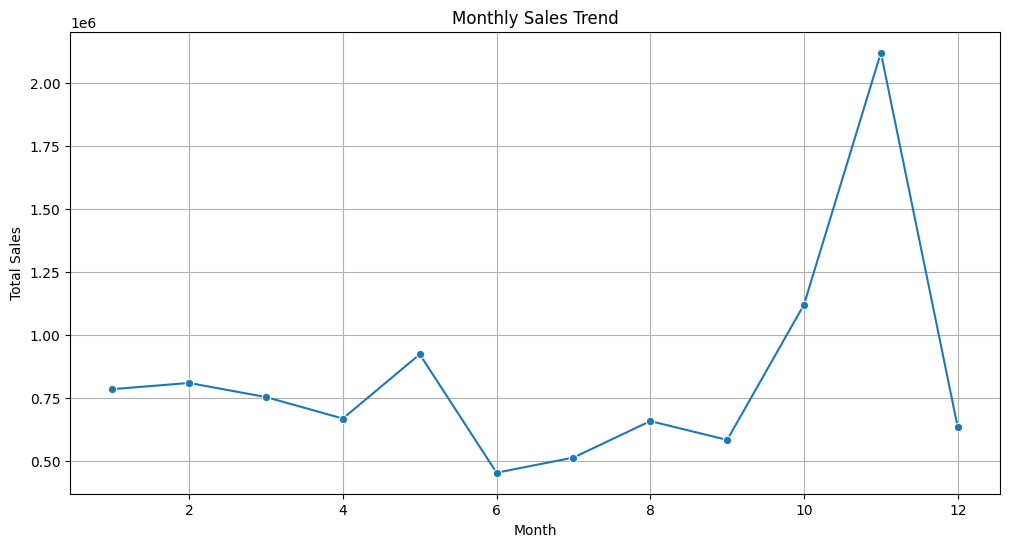

In [ ]:
# Total Revenue Each Month
df_eachmonth = df.groupby('month_id')['sales'].sum().reset_index()
print("Total Revenue Each Month")
print(df_eachmonth)

# Plotting the sales trend
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(x='month_id', y='sales', data=df_eachmonth, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Total units sold for each month
    month_id  quantityorder
0          1           7997
1          2           7903
2          3           7585
3          4           6704
4          5           8992
5          6           4620
6          7           4899
7          8           6538
8          9           5681
9         10          10998
10        11          20857
11        12           6293


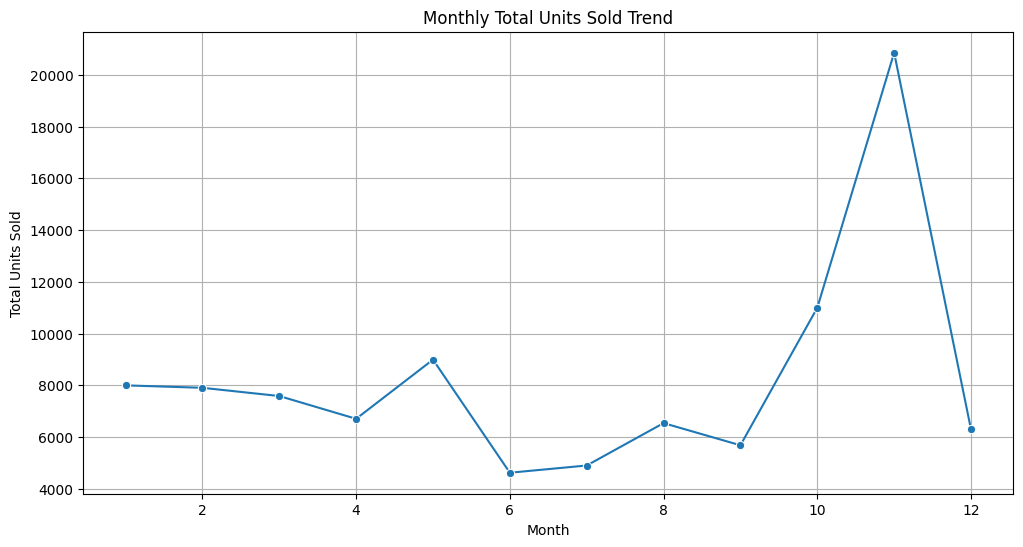

In [ ]:
#Total units sold for each month
totalunits_eachmonth = df.groupby('month_id')['quantityorder'].sum().reset_index()
print("Total units sold for each month")
print(totalunits_eachmonth)

# Plotting the total units sold trend
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(x='month_id', y='quantityorder', data=totalunits_eachmonth, marker='o')
plt.title('Monthly Total Units Sold Trend')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.grid(True)
plt.show()

    month_id           product  priceeach
0          1      Classic Cars  88.895000
1          1       Motorcycles  81.969167
2          1            Planes  76.437647
3          1             Ships  89.193889
4          1            Trains  75.375714
5          1  Trucks and Buses  86.541739
6          1      Vintage Cars  77.220806
7          2      Classic Cars  86.780548
8          2       Motorcycles  87.313824
9          2            Planes  82.909677
10         2             Ships  84.750000
11         2            Trains  71.165714
12         2  Trucks and Buses  87.250000
13         2      Vintage Cars  79.098158
14         3      Classic Cars  85.948030
15         3       Motorcycles  77.538333
16         3            Planes  77.664583
17         3             Ships  85.647273
18         3            Trains  76.478333
19         3  Trucks and Buses  84.462632
20         3      Vintage Cars  79.868421
21         4      Classic Cars  87.569091
22         4       Motorcycles  84

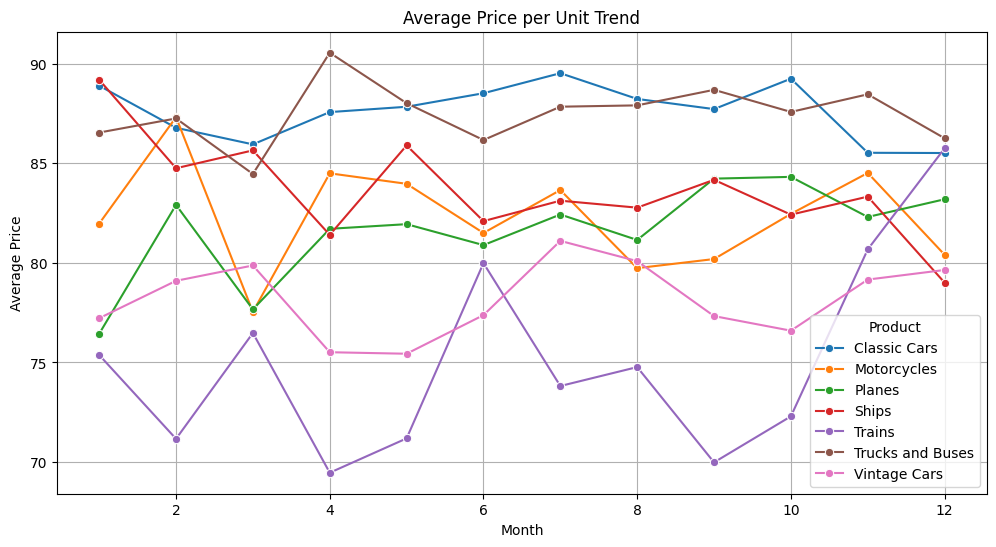

In [ ]:
#Average price per unit for each month
pd.set_option("display.max_rows", None) # To view all rows
df_units=df.groupby(['month_id','product'])
avg_pricee=df_units['priceeach'].mean().reset_index()
print(avg_pricee)

# Plotting the average price trend
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(x='month_id', y='priceeach', hue='product', data=avg_pricee, marker='o')
plt.title('Average Price per Unit Trend')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend(title='Product')  # Add a legend to distinguish products
plt.show()


In [ ]:
###  top 5 cities with higest sails
df_top5sales = df.groupby('city')['sales'].sum().reset_index()

print("top 5 cities with higest sails")
print(df_top5sales[['city', 'sales']].sort_values(by=['sales'], ascending=False).head(5))



top 5 cities with higest sails
          city       sales
34      Madrid  1082551.44
61  San Rafael   654858.06
42         NYC   560787.77
63   Singapore   288488.41
52       Paris   268944.68
